In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#table of observed data
infected = [8, 162]
not_infected = [21712, 21566]
observed = np.array([infected,not_infected])
observed

array([[    8,   162],
       [21712, 21566]])

In [22]:
#table for expected data (if vaccine didn't work)
infected_placebo_expected = (8+162)/(np.sum(observed))*(162+21566)
infected_drug_expected = (8+162)/(np.sum(observed))*(8+21712)
not_infected_drug_expected = (21712+21566)/(np.sum(observed))*(8+21712)
# not_infected_placebo_expected = (1215+21566)/(np.sum(observed))*(162+21566) # typo here
not_infected_placebo_expected = (21712+21566)/(np.sum(observed))*(162+21566)
infected_expected = [infected_drug_expected,infected_placebo_expected]
not_infected_expected = [not_infected_drug_expected,not_infected_placebo_expected]
expected = np.array([infected_expected,not_infected_expected])
expected

array([[   84.98434911,    85.01565089],
       [21635.01565089, 21642.98434911]])

In [23]:
#chi squared of observed data
chi_squared_observed = np.sum(((observed-expected)**2)/expected)
chi_squared_observed

139.9969506977457

In [24]:
#define the general chi squared formula
def chi_squared_function(observed_data,expected_data):
    numerator = (observed_data-expected_data)**2
    chi_squared = np.sum(numerator/expected_data)
    return(chi_squared)

In [25]:
chi_squared_function(observed, expected)

139.9969506977457

In [26]:
#bootstrapping
new_population = ["infected"]*170+["not_infected"]*43278

In [27]:
new_observed = np.zeros([2,2])

In [28]:
#vaccine group
new_drug = np.random.choice(new_population, 21720)
count_infected_drug = np.sum(new_drug=="infected")
count_not_infected_drug = np.sum(new_drug=="not_infected")
new_observed[0,0] = count_infected_drug
new_observed[1,0] = count_not_infected_drug

#placebo group
new_placebo = np.random.choice(new_population, 21728)
count_infected_placebo = np.sum(new_placebo=="infected")
count_not_infected_placebo = np.sum(new_placebo=="not_infected")
new_observed[0,1] = count_infected_placebo
new_observed[1,1] = count_not_infected_placebo
new_observed

array([[   91.,    86.],
       [21629., 21642.]])

In [29]:
chi_squared_function(new_observed,expected)

0.43893490045404987

In [30]:
total = 10000
chi_squared = np.zeros(total)
for i in range(total):
    new_observed = np.zeros([2,2])
    new_drug = np.random.choice(new_population, 21720)
    new_placebo = np.random.choice(new_population, 21728)
    count_infected_drug = np.sum(new_drug=="infected")
    count_not_infected_drug = np.sum(new_drug=="not_infected")
    count_infected_placebo = np.sum(new_placebo=="infected")
    count_not_infected_placebo = np.sum(new_placebo=="not_infected")
    new_observed[0,0] = count_infected_drug
    new_observed[1,0] = count_not_infected_drug
    new_observed[0,1] = count_infected_placebo
    new_observed[1,1] = count_not_infected_placebo
    chi_squared[i] = chi_squared_function(new_observed,expected)

'P-Value'

0.0

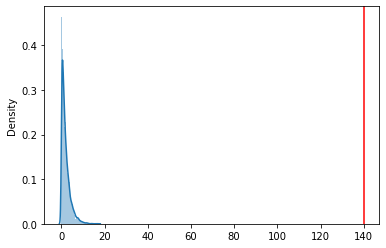

In [31]:
#p value
count = np.sum(chi_squared>=chi_squared_observed)
pvalue = count/total
display("P-Value",pvalue)
#histogram
p=sns.distplot(chi_squared,kde= True)
p.axvline(chi_squared_observed,color="red");

In [32]:
#start of analysis
probability_infection_drug = (8.)/(8.+162.)
probability_infection_placebo = (162.)/(8.+162.)
relative_risk_observed = probability_infection_drug/probability_infection_placebo
relative_risk_observed

0.0493827160493827

In [33]:
probability_infection_drug = (observed[0,0])/(observed[0,0]+observed[0,1])
probability_infection_placebo = (observed[0,1])/(observed[0,0]+observed[0,1])
relative_risk_observed = probability_infection_drug/probability_infection_placebo
relative_risk_observed

0.04938271604938272

In [34]:
new_drug_list = ["infected"]*8+["not infected"]*21712
new_placebo_list = ["infected"]*162+["not infected"]*21566

In [35]:
new_data = np.zeros([2,2])
random_drug = np.random.choice(new_drug_list,21720)
count_infected_drug = np.sum(random_drug=="infected")
count_not_infected_drug = np.sum(random_drug=="not infected")
random_placebo = np.random.choice(new_placebo_list,21728)
count_infected_placebo = np.sum(random_placebo=="infected")
count_not_infected_placebo = np.sum(random_placebo=="not infected")
new_data[0,0] = count_infected_drug
new_data[1,0] = count_not_infected_drug
new_data[0,1] = count_infected_placebo
new_data[1,1] = count_not_infected_placebo
new_data

array([[1.1000e+01, 1.4500e+02],
       [2.1709e+04, 2.1583e+04]])

In [36]:
probability_infection_drug = (new_data[0,0])/(new_data[0,0]+new_data[0,1])
probability_infection_placebo = (new_data[0,1])/(new_data[0,0]+new_data[0,1])
relative_risk = probability_infection_drug/probability_infection_placebo
relative_risk

0.07586206896551724

In [37]:
total = 10000
new_relative_risk = np.zeros(total)
for i in range(total):
    new_data = np.zeros([2,2])
    random_drug = np.random.choice(new_drug_list,21720)
    count_infected_drug = np.sum(random_drug=="infected")
    count_not_infected_drug = np.sum(random_drug=="not infected")
    random_placebo = np.random.choice(new_placebo_list,21728)
    count_infected_placebo = np.sum(random_placebo=="infected")
    count_not_infected_placebo = np.sum(random_placebo=="not infected")
    new_data[0,0] = count_infected_drug
    new_data[1,0] = count_not_infected_drug
    new_data[0,1] = count_infected_placebo
    new_data[1,1] = count_not_infected_placebo
    probability_infection_drug = (new_data[0,0])/(new_data[0,0]+new_data[0,1])
    probability_infection_placebo = (new_data[0,1])/(new_data[0,0]+new_data[0,1])
    new_relative_risk[i] = probability_infection_drug/probability_infection_placebo
new_relative_risk

array([0.04938272, 0.04054054, 0.06944444, ..., 0.04054054, 0.0625    ,
       0.06382979])

/ext/sage/sage-9.2/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'M Upper Pivotal'

0.0870695256660169

'M Lower Pivotal'

-0.005401234567901231

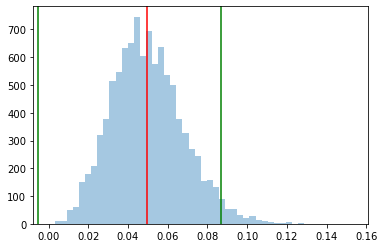

In [38]:
p=sns.distplot(new_relative_risk,kde=False)
p.axvline(relative_risk_observed,color="red");
new_relative_risk.sort()
m_lower = new_relative_risk[49]
m_upper = new_relative_risk[9949]
m_upper_pivotal = 2*relative_risk_observed - m_lower
m_lower_pivotal = 2*relative_risk_observed - m_upper
p.axvline(m_upper_pivotal, color="green");
p.axvline(m_lower_pivotal, color="green");
display("M Upper Pivotal", m_upper_pivotal, "M Lower Pivotal", m_lower_pivotal)